In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/Users/Tim/PycharmProjects/HOI/')

In [5]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

In [7]:
from synthetic_data import nonstationary_ts_n
from HOI.preprocessings import compute_kernel, compute_kernel_n
from HOI.tests import test_lancaster, lancaster_permutation

In [19]:
import matplotlib.pyplot as plt

In [45]:
def plot_test(data, mode):
    x = np.arange(0.1, 1, 0.1)
    y = np.array(data)

    fig = plt.figure(dpi=800)
    ax = fig.add_subplot(111)
    ax.set_ylim(0,1.05)
    ax.set_xlabel('dependence coefficient')
    ax.set_ylabel(mode)
    ax.set_title(mode + ' of Streitberg interaction tests')
    plt.plot(x,y, marker='o', color='b')
    for i,j in zip(x,y):
        ax.annotate(str(j),xy=(i,j))
    plt.show()

# case 1, gt = 1000

In [12]:
d1, d2, _, d3 = nonstationary_ts_n(n_sample=300, t_time=10, d=0.1, mode='case1', a=0.5, order=3)
kd1 = compute_kernel_n(d1)
kd2 = compute_kernel_n(d2)
kd3 = compute_kernel_n(d3)
statistic, critical_value, pval, reject = test_lancaster([kd1, kd2, kd3], n_perms=5000, alpha=0.05)
print(statistic, critical_value, pval, reject)

0.0009066896045530055 0.00025360138872669813 0.0001999600079984003 1


In [14]:
power ={}
for d in tqdm(np.arange(0.01, 0.1, 0.01)):
    rejects = 0
    for i in tqdm(np.arange(100)):
        d1, d2, _, d3 = nonstationary_ts_n(n_sample=300, t_time=10, d=d, mode='case1', a=0.5, order=3)
        kd1 = compute_kernel_n(d1)
        kd2 = compute_kernel_n(d2)
        kd3 = compute_kernel_n(d3)
        _, _, _, reject = test_lancaster([kd1, kd2, kd3], n_perms=5000, alpha=0.05)       
        rejects = rejects + reject
    power[str(d)] = rejects/100
    print(power)

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

{'0.01': 0.3}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.01': 0.3, '0.02': 0.99}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.01': 0.3, '0.02': 0.99, '0.03': 1.0}


  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [41]:
power_new = {'0.01': 0.3, 
             '0.02': 1, 
             '0.03': 1, 
             '0.04': 1,
             '0.05': 1, 
             '0.06': 1,
             '0.07': 1, 
             '0.08': 1,
             '0.09': 1}

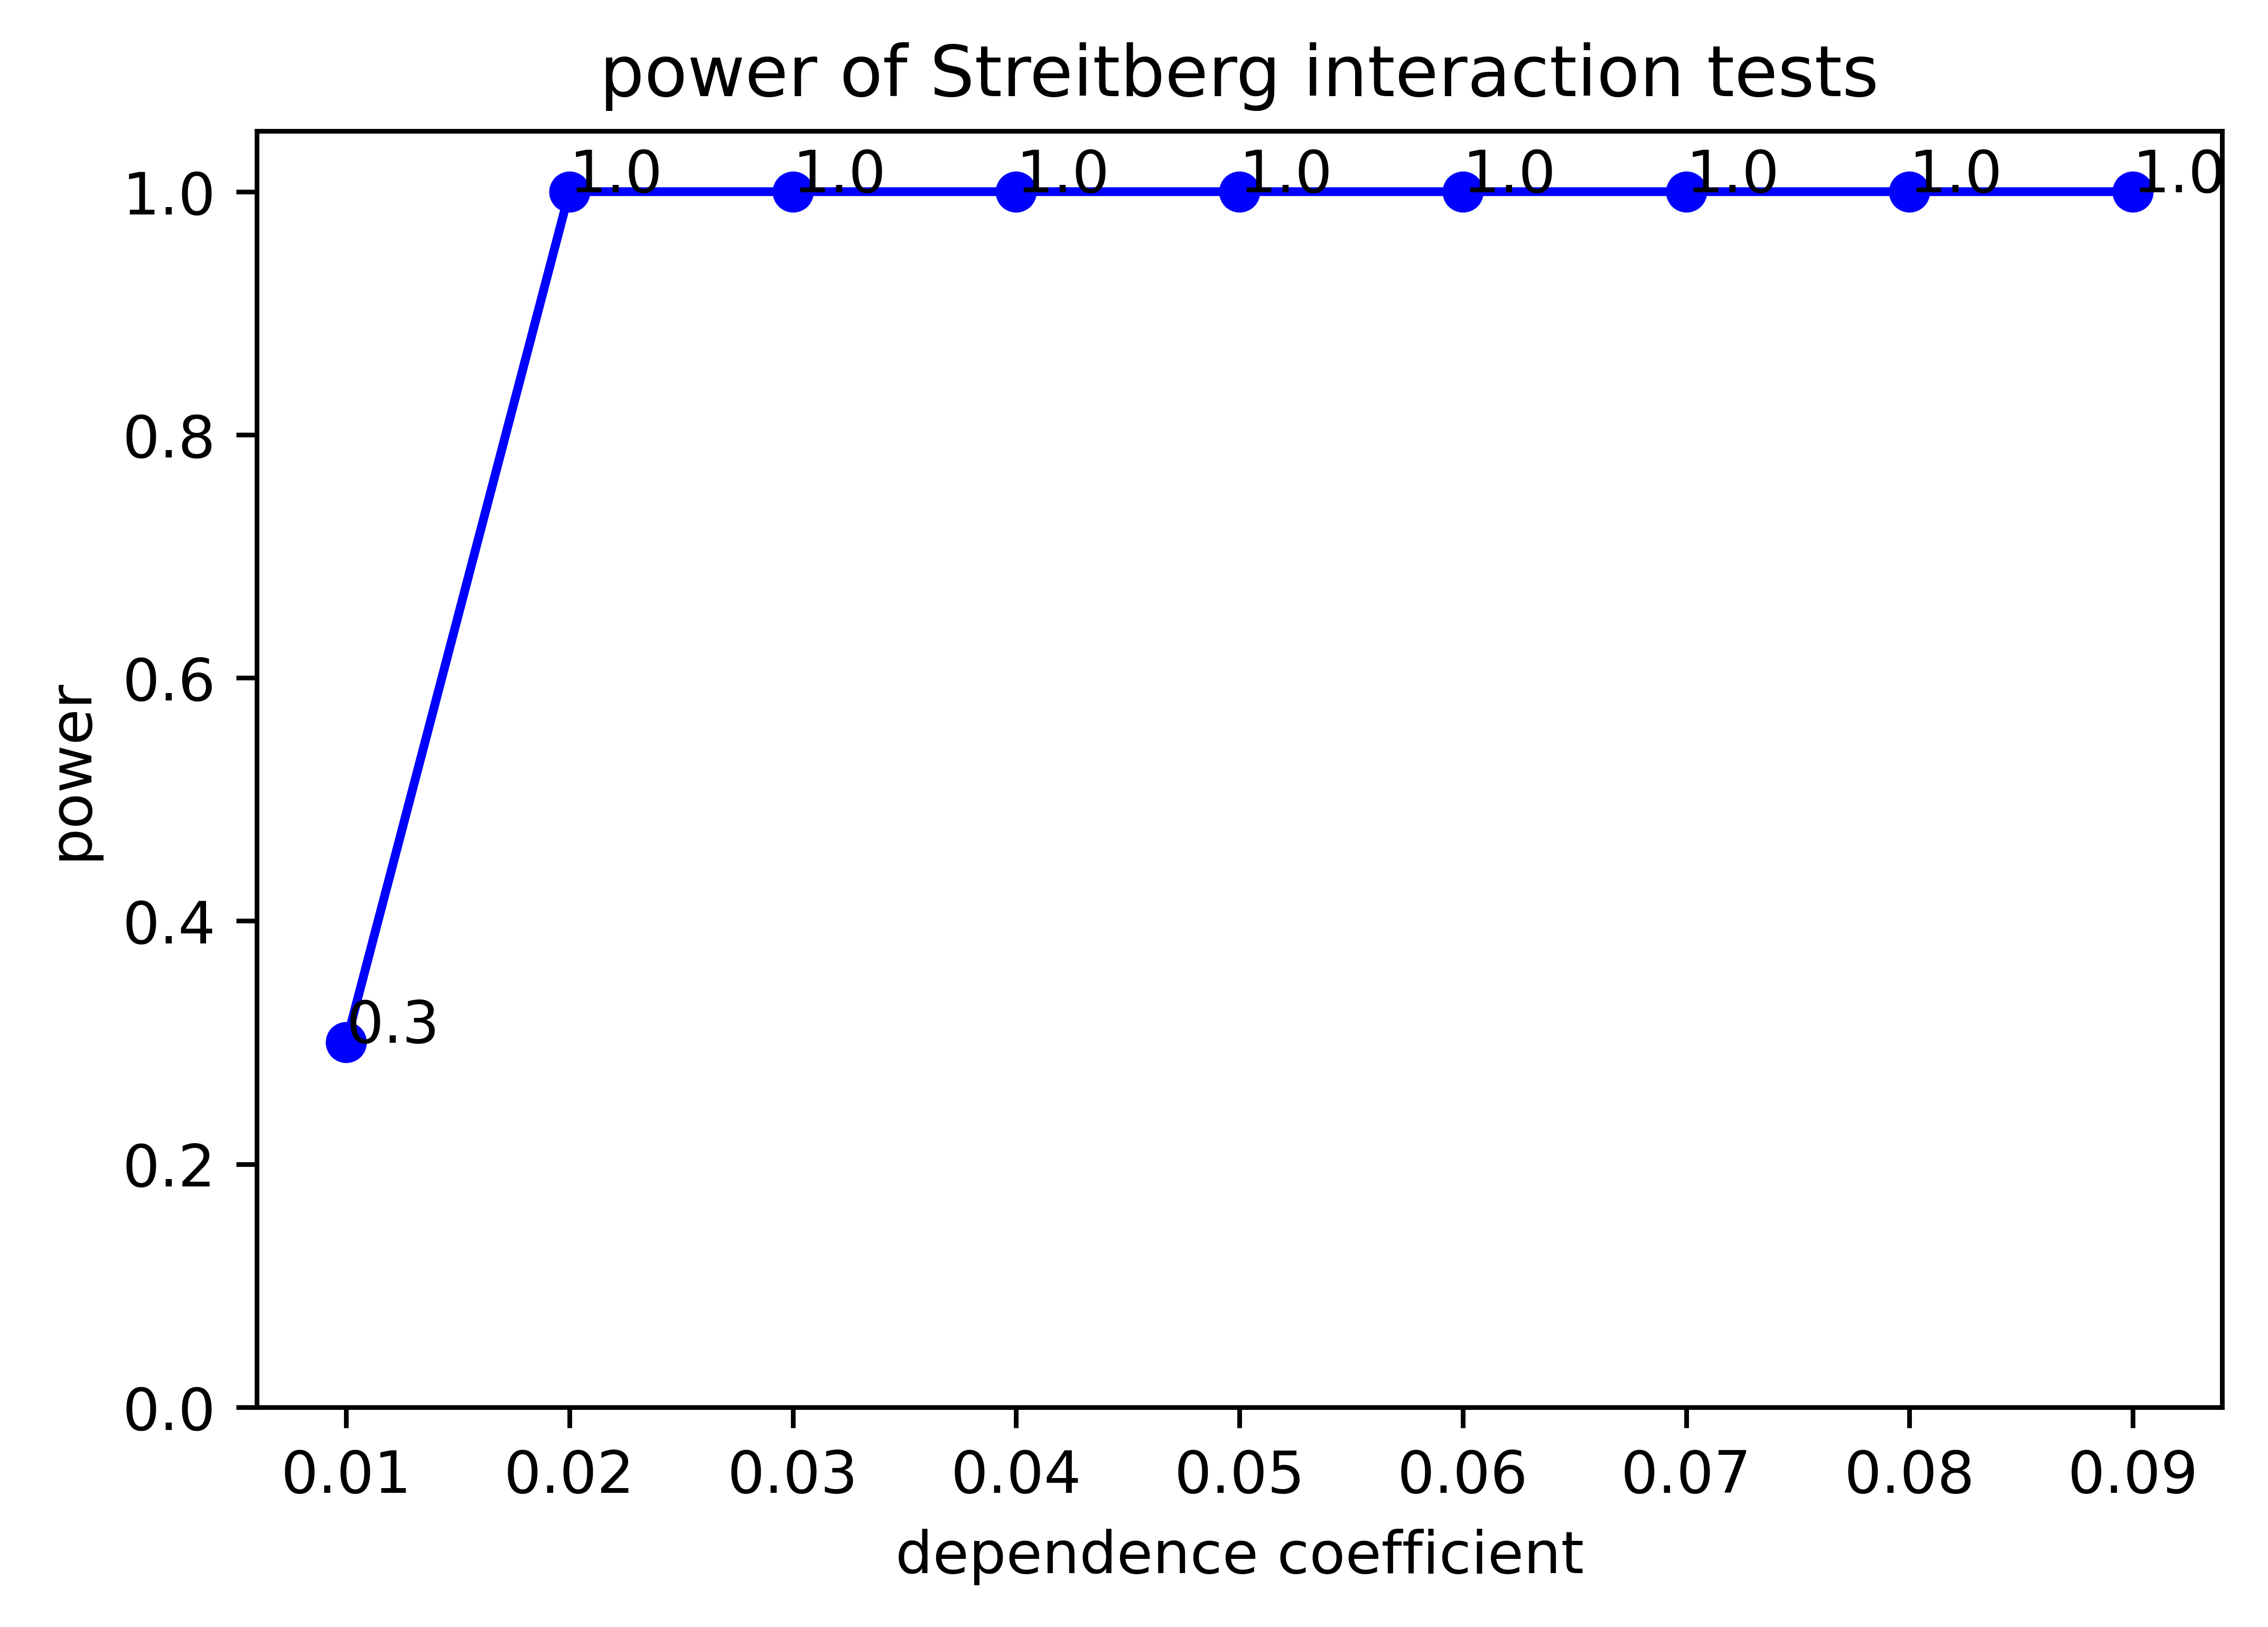

In [44]:
plot_test(list(power_new.values()), 'power')

# case 2, gt = 1011

In [31]:
power ={}
for d in tqdm(np.arange(0.1, 1, 0.1)):
    rejects = 0
    for i in tqdm(np.arange(100)):
        d1, d2, _, d3 = nonstationary_ts_n(n_sample=300, t_time=10, d=d, mode='case2', a=0.5, order=3)
        kd1 = compute_kernel_n(d1)
        kd2 = compute_kernel_n(d2)
        kd3 = compute_kernel_n(d3)
        _, _, _, reject = test_lancaster([kd1, kd2, kd3], n_perms=5000, alpha=0.05)       
        rejects = rejects + reject
    power[str(d)] = rejects/100
    print(power)

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.05}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.05, '0.2': 0.11}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.05, '0.2': 0.11, '0.30000000000000004': 0.36}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.05, '0.2': 0.11, '0.30000000000000004': 0.36, '0.4': 0.89}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.05, '0.2': 0.11, '0.30000000000000004': 0.36, '0.4': 0.89, '0.5': 0.99}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.05, '0.2': 0.11, '0.30000000000000004': 0.36, '0.4': 0.89, '0.5': 0.99, '0.6': 1.0}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.05, '0.2': 0.11, '0.30000000000000004': 0.36, '0.4': 0.89, '0.5': 0.99, '0.6': 1.0, '0.7000000000000001': 1.0}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.05, '0.2': 0.11, '0.30000000000000004': 0.36, '0.4': 0.89, '0.5': 0.99, '0.6': 1.0, '0.7000000000000001': 1.0, '0.8': 1.0}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.05, '0.2': 0.11, '0.30000000000000004': 0.36, '0.4': 0.89, '0.5': 0.99, '0.6': 1.0, '0.7000000000000001': 1.0, '0.8': 1.0, '0.9': 1.0}


In [46]:
power_new = {'0.1': 0.05, 
             '0.2': 0.11,
             '0.3': 0.36,
             '0.4': 0.89, 
             '0.5': 0.99,
             '0.6': 1.0, 
             '0.7': 1.0,
             '0.8': 1.0,
             '0.9': 1.0}

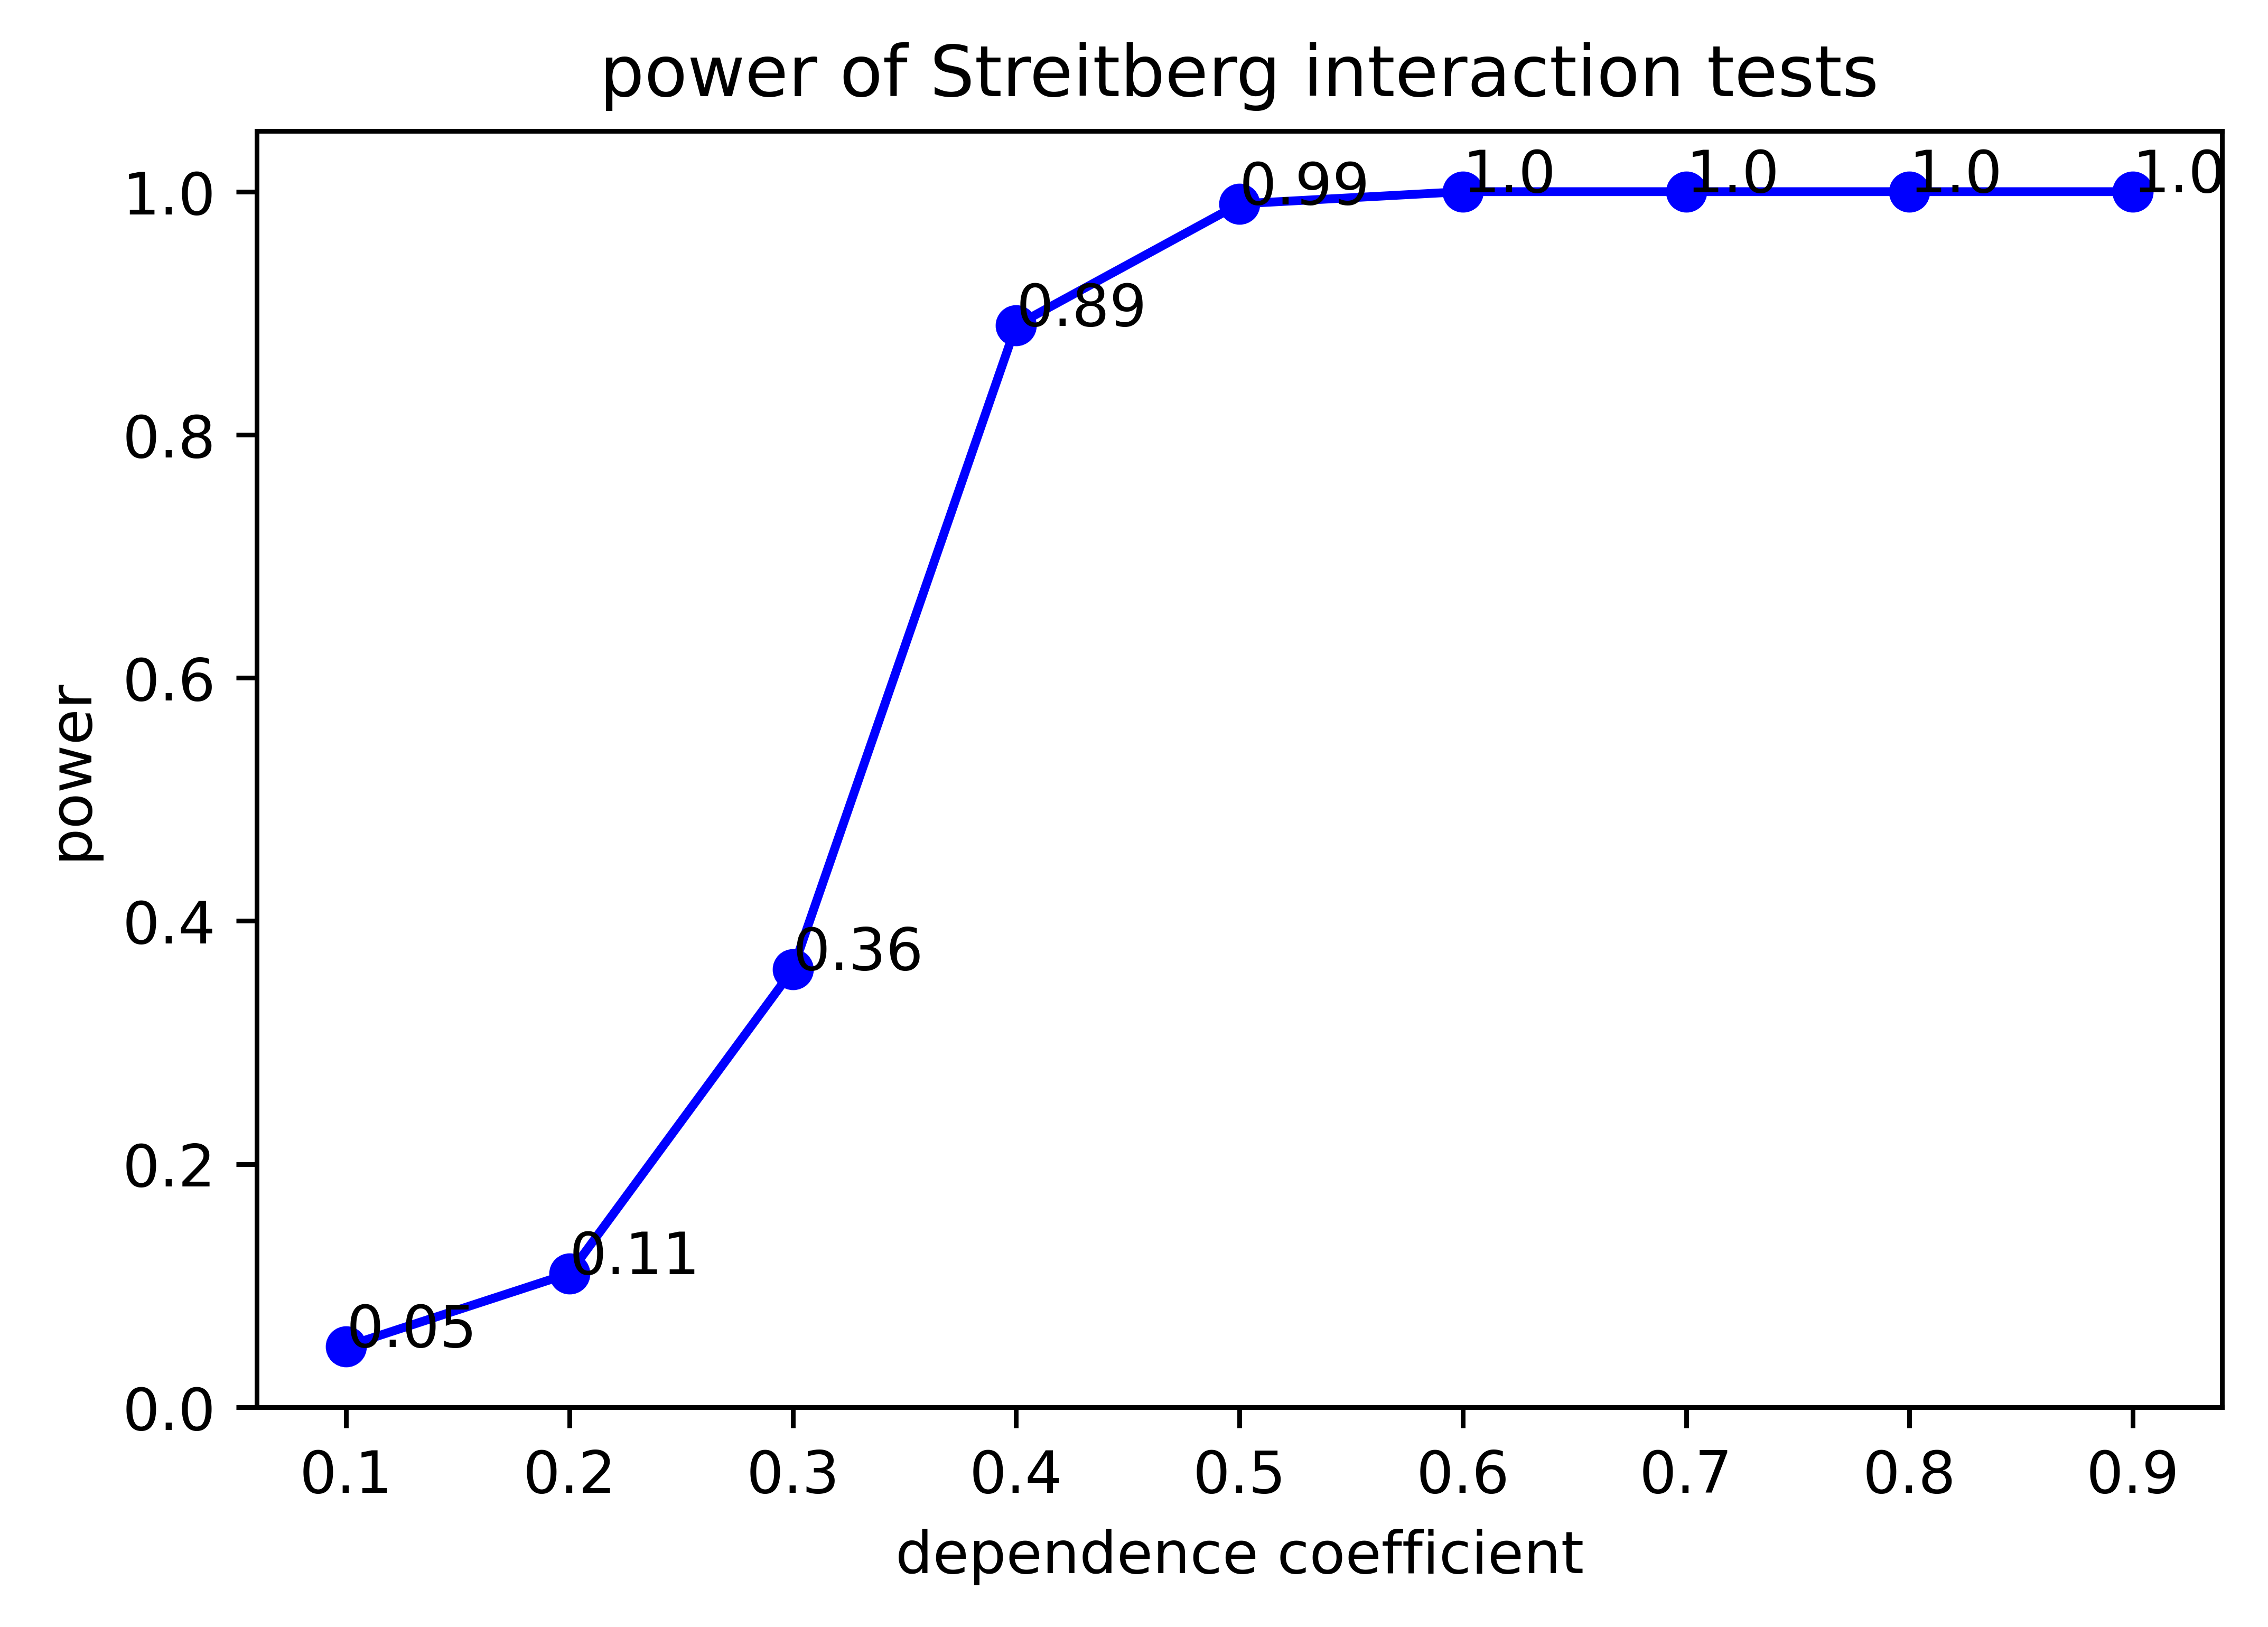

In [47]:
plot_test(list(power_new.values()), 'power')

# case 3, gt = 0000

In [33]:
power ={}
for d in tqdm(np.arange(0.1, 1, 0.1)):
    rejects = 0
    for i in tqdm(np.arange(100)):
        d1, d2, _, d3 = nonstationary_ts_n(n_sample=300, t_time=10, d=0.5, mode='case3', a=d, order=3)
        kd1 = compute_kernel_n(d1)
        kd2 = compute_kernel_n(d2)
        kd3 = compute_kernel_n(d3)
        _, _, _, reject = test_lancaster([kd1, kd2, kd3], n_perms=5000, alpha=0.05)       
        rejects = rejects + reject
    power[str(d)] = rejects/100
    print(power)

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.03}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.03, '0.2': 0.07}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.03, '0.2': 0.07, '0.30000000000000004': 0.09}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.03, '0.2': 0.07, '0.30000000000000004': 0.09, '0.4': 0.08}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.03, '0.2': 0.07, '0.30000000000000004': 0.09, '0.4': 0.08, '0.5': 0.05}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.03, '0.2': 0.07, '0.30000000000000004': 0.09, '0.4': 0.08, '0.5': 0.05, '0.6': 0.12}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.03, '0.2': 0.07, '0.30000000000000004': 0.09, '0.4': 0.08, '0.5': 0.05, '0.6': 0.12, '0.7000000000000001': 0.05}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.03, '0.2': 0.07, '0.30000000000000004': 0.09, '0.4': 0.08, '0.5': 0.05, '0.6': 0.12, '0.7000000000000001': 0.05, '0.8': 0.08}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.1': 0.03, '0.2': 0.07, '0.30000000000000004': 0.09, '0.4': 0.08, '0.5': 0.05, '0.6': 0.12, '0.7000000000000001': 0.05, '0.8': 0.08, '0.9': 0.04}


In [48]:
power_new = {'0.1': 0.03,
             '0.2': 0.07,
             '0.3': 0.09, 
             '0.4': 0.08, 
             '0.5': 0.05, 
             '0.6': 0.12, 
             '0.7': 0.05, 
             '0.8': 0.08,
             '0.9': 0.04}

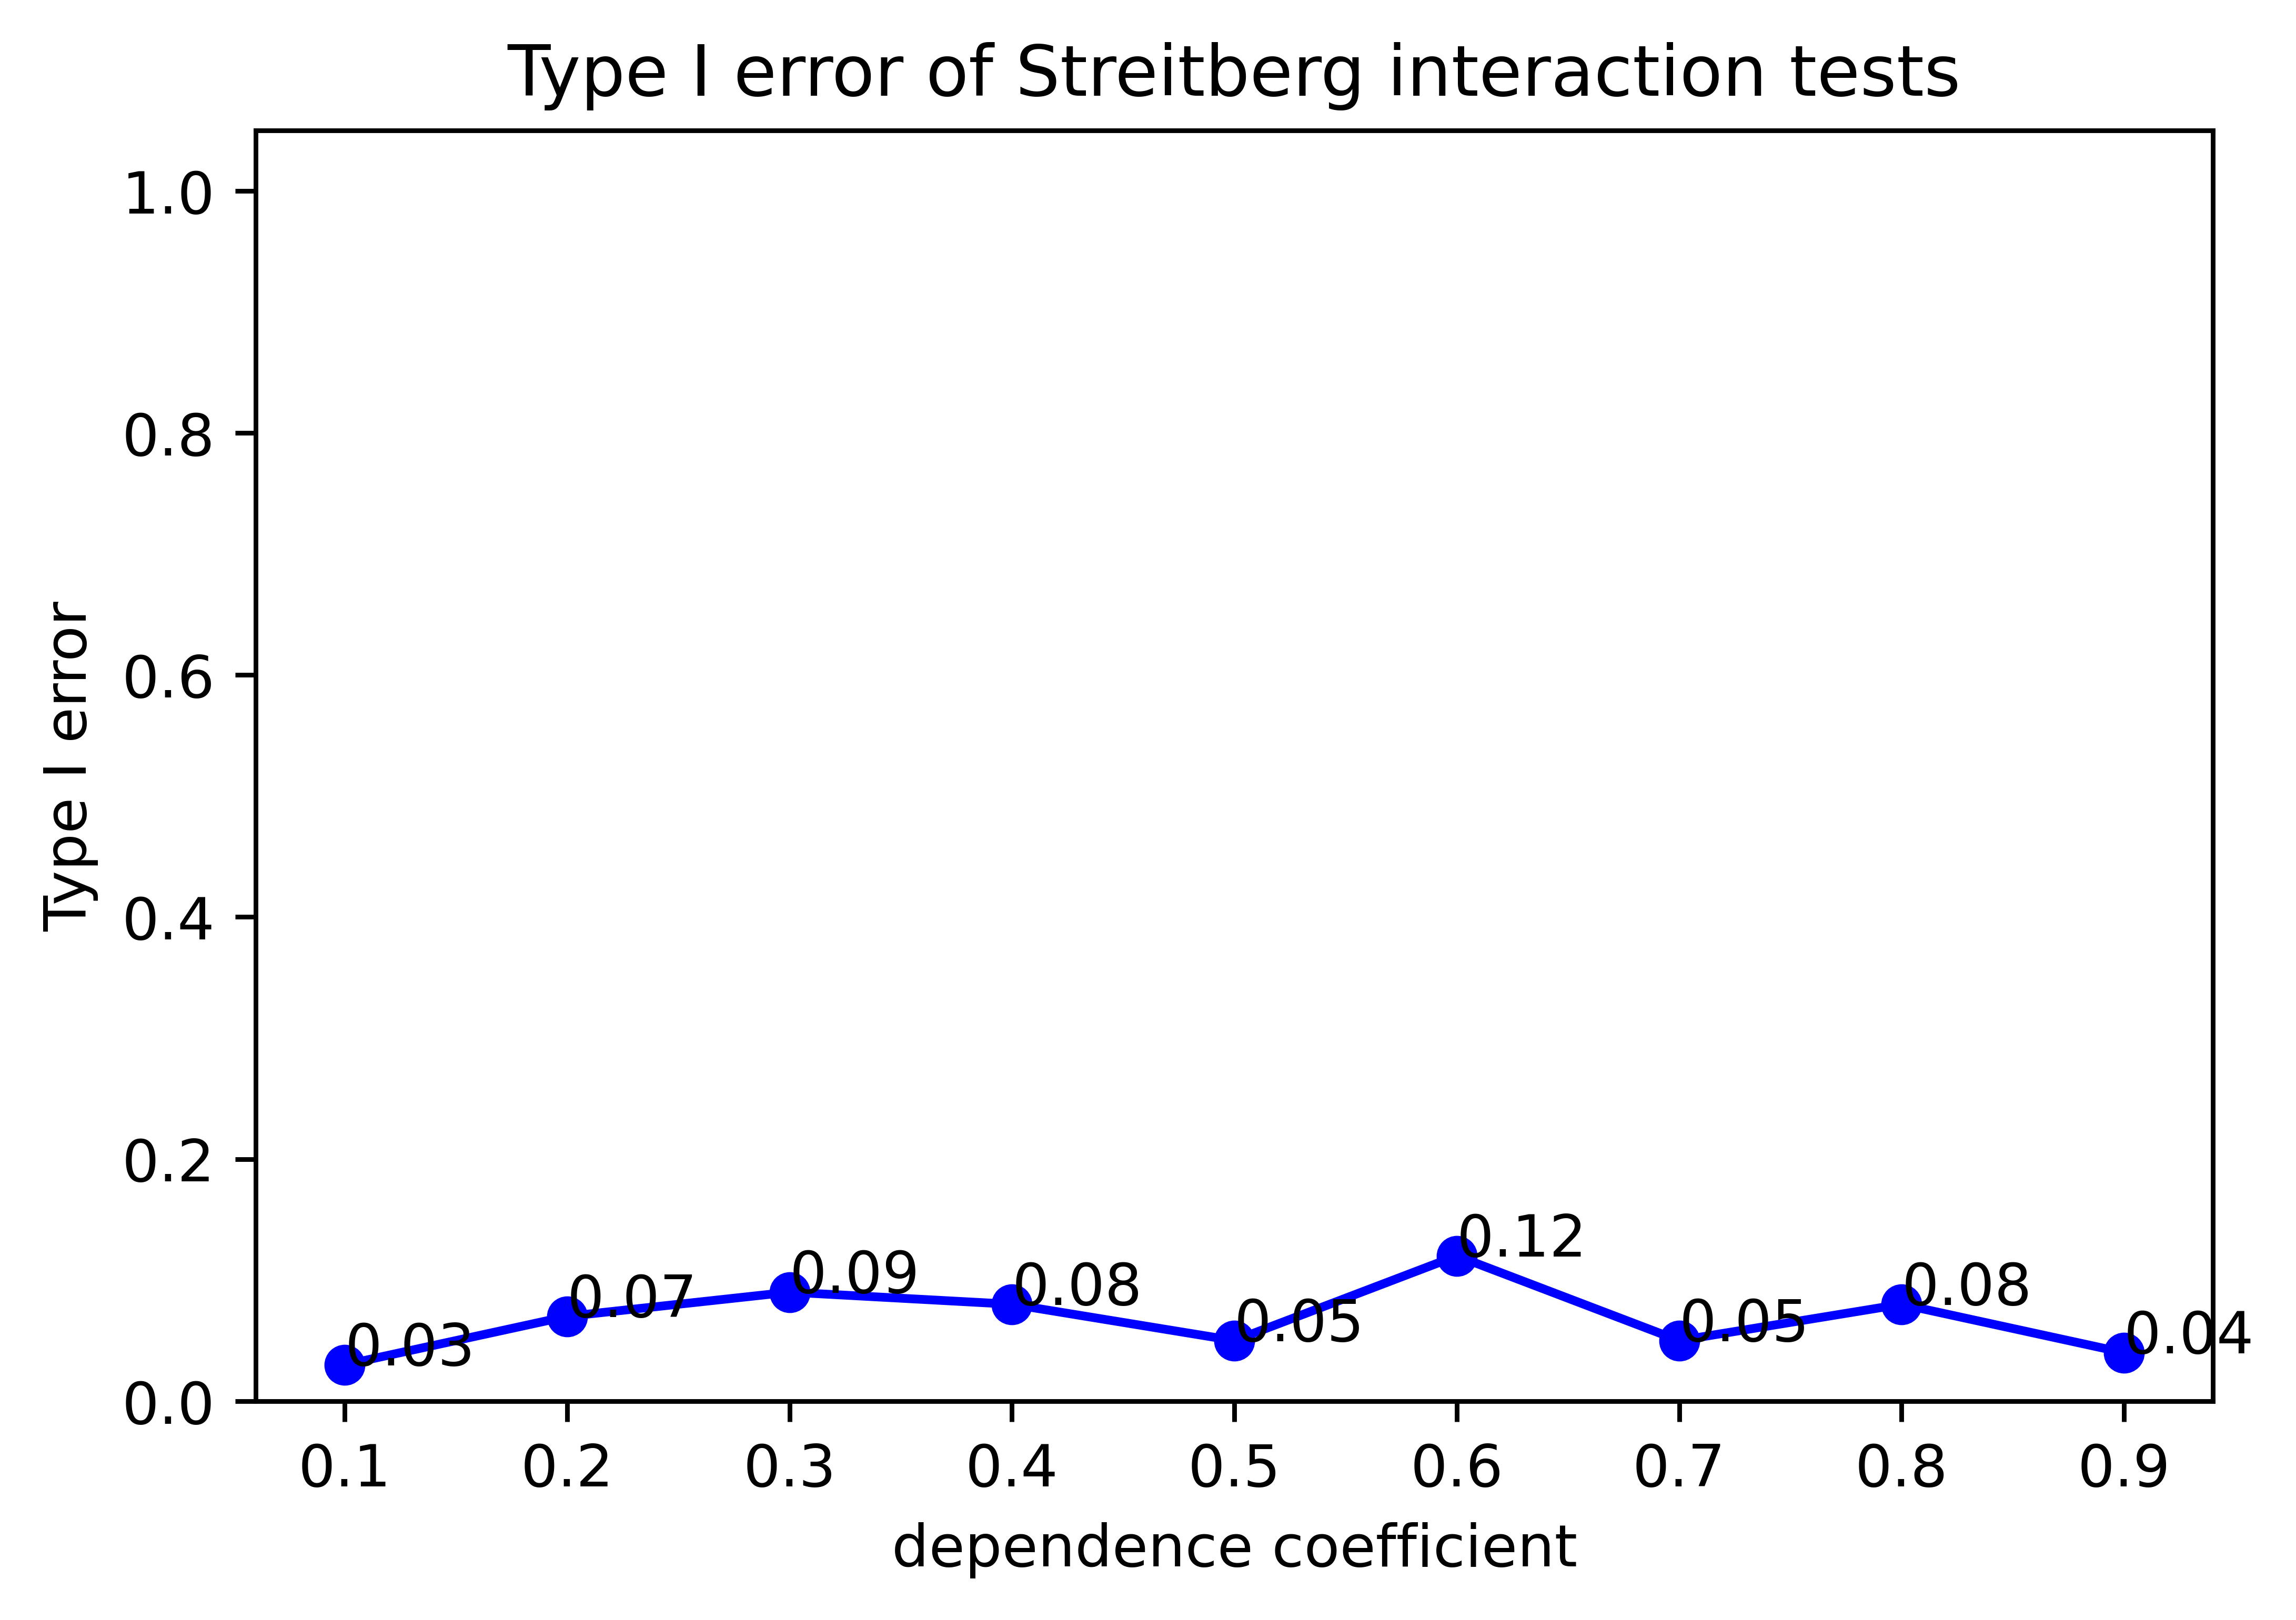

In [49]:
plot_test(list(power_new.values()), 'Type I error')